<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/RegLin_HoustingUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/datasets_7039_10115_USA_Housing.csv'

df = pd.read_csv(url)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
'''
the data contains the following columns(features)

Media Ingreso del área ': Prom. Los ingresos de los residentes de la casa de la ciudad se encuentran en.
'Prom. Area House Age ': edad promedio de las casas en la misma ciudad
'Prom. Area Number of Rooms ': Cantidad promedio de habitaciones para casas en la misma ciudad
'Prom. Area Number of Bedrooms ': Promedio de habitaciones para casas en la misma ciudad
'Población del área': La población de la casa de la ciudad se encuentra en
'Precio': precio al que se vendió la casa
'Dirección': Dirección de la casa

SyntaxError: ignored

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [8]:
# Tipo de cada serie
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
# Descripcion estadistica de todos los datos
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


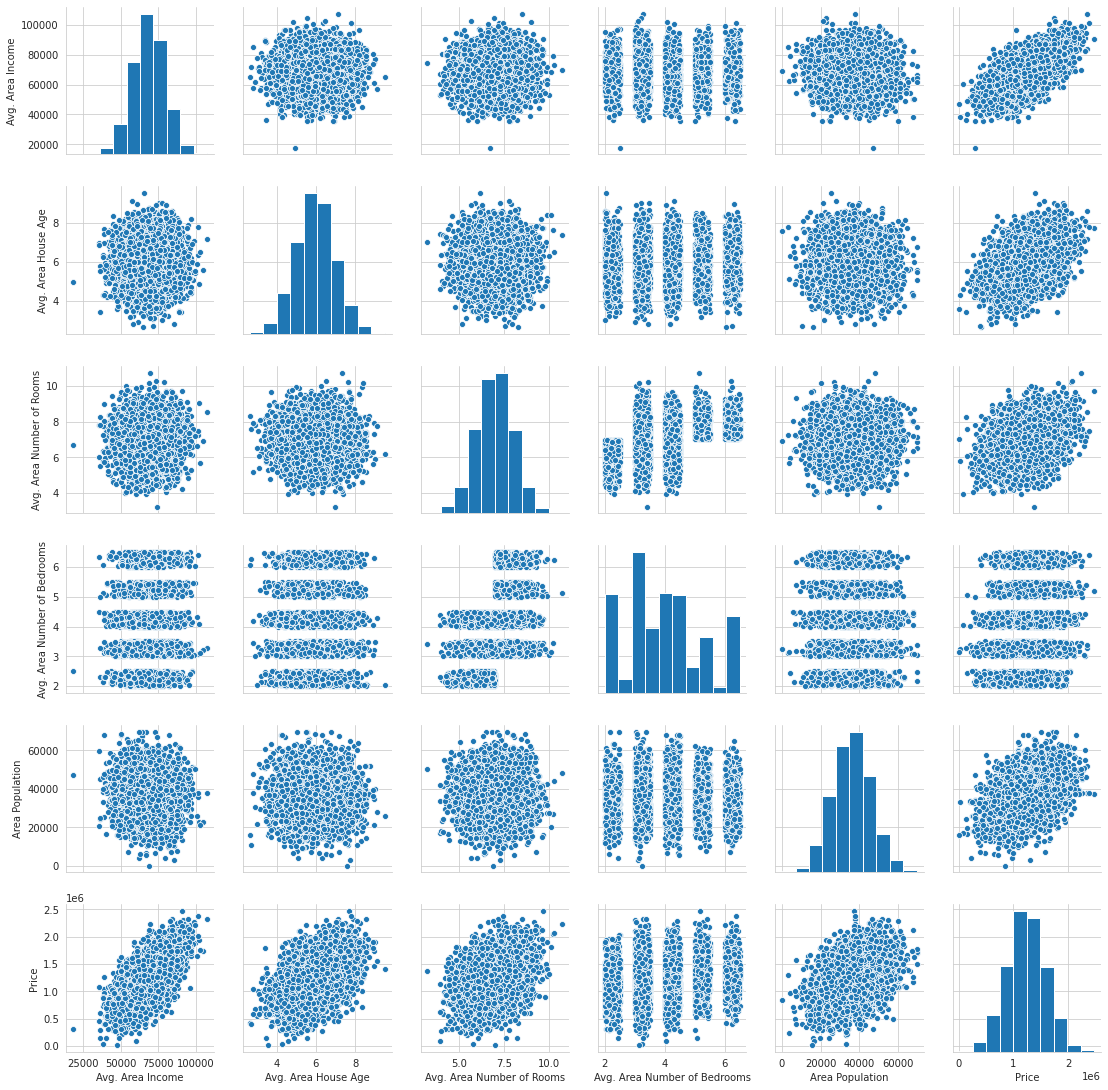

In [10]:
sns.pairplot(df)
plt.savefig('Pairplot_HOustin.png')
plt.show()

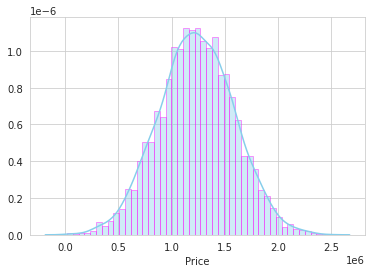

In [15]:
# Distribution of Housing Price Across USA
sns.distplot(df['Price'], hist_kws=dict(edgecolor='magenta', linewidth=1), color='skyblue')

In [16]:
#Displaying correlation among all the columns

df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


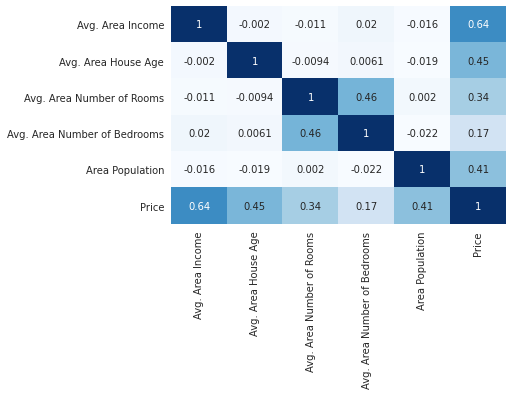

In [21]:
# Displaying correlation among all the columns using Heat Map

sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Blues')

In [38]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df[['Price']]

df[['Address']] # Nombres de los clientes



,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=.2)

In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

print(lm.intercept_)

[-2640441.3997814]


In [51]:
df_coeff = pd.DataFrame(lm.coef_.T, X.columns, columns=['Coefficients'])

df_coeff.head()

,Coefficients
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


In [56]:
prediction = lm.predict(X_test)

lm.score(X_test, y_test)

0.9211719165402232

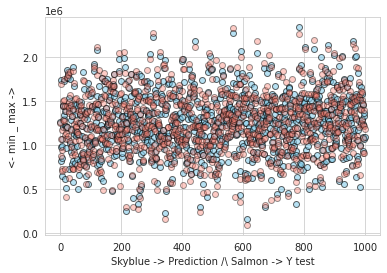

In [71]:
plt.scatter(range(0,len(y_test)), prediction, edgecolor='black', c='skyblue', alpha=.6)
plt.scatter(range(0,len(y_test)), y_test, c='salmon', edgecolor='black', alpha=.4)
plt.xlabel('Skyblue -> Prediction /\ Salmon -> Y test')
plt.ylabel('<- min _ max ->')
plt.show()

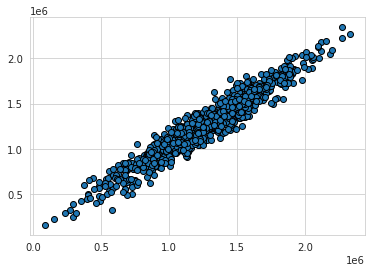

In [72]:
plt.scatter(y_test, prediction, edgecolor='black')

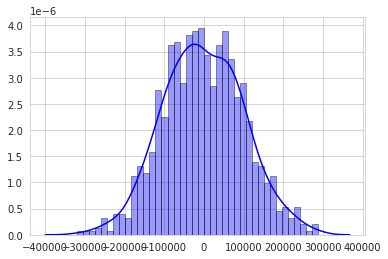

In [81]:
sns.distplot((y_test - prediction), bins=40, hist_kws=dict(edgecolor='black', linewidth=1), color='blue')

In [86]:
from sklearn import metrics

print('Mean absolute error MAE',metrics.mean_absolute_error(y_test, prediction))
print('Mean squared error MSE',metrics.mean_squared_error(y_test, prediction))
print('Root mean squared error RMSE',np.sqrt(metrics.mean_squared_error(y_test, prediction)))


Mean absolute error MAE 81305.23300085647
Mean squared error MSE 10100187858.864885
Root mean squared error RMSE 100499.69083964829
